In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set_theme()
    
paths = [f.path for f in os.scandir('target/criterion/') if f.is_dir()]
paths.remove('target/criterion/report')

report = {}

for path in paths:
    path_end = path.split('/')[-1].split(' ')
    function_name = path_end[0]
    
    size_paths = [f.path for f in os.scandir(path) if f.is_dir() and not f.path.endswith('report')]
        
    for size_path in size_paths:
        size = int(size_path.split('/')[-1])
        with open(os.path.join(size_path, 'base', 'estimates.json'), 'r') as f:
            data = json.load(f)
            
            if function_name not in report:
                report[function_name] = {}
                            
            report[function_name][size] = data['median']['point_estimate']
        

In [2]:
df = pd.DataFrame(report)
df

,cost_load_contract,cost_block_info,cost_add,cost_stx_transfer,cost_tuple_get,cost_sub
706,20138.659553,NaN,NaN,NaN,NaN,NaN
134,5390.874458,NaN,NaN,NaN,NaN,NaN
10498,271367.131237,NaN,NaN,NaN,NaN,NaN
707,20653.036289,NaN,NaN,NaN,NaN,NaN
216,7654.512747,NaN,NaN,NaN,NaN,NaN
20946,537665.010403,NaN,NaN,NaN,NaN,NaN
217,7507.395395,NaN,NaN,NaN,NaN,NaN
20923,540617.697815,NaN,NaN,NaN,NaN,NaN
10482,277418.383873,NaN,NaN,NaN,NaN,NaN
5277,139811.081122,NaN,NaN,NaN,NaN,NaN


In [3]:
def estimate_params(df, name, transform):
    X = df.index.values.reshape(-1, 1)
    Y = df[name].values.reshape(-1, 1)
    X = X[np.logical_not(np.isnan(Y))].reshape(-1, 1)
    Y = Y[np.logical_not(np.isnan(Y))]
    X = transform(X)
#     Y = transform(Y)

    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    b = linear_regressor.intercept_
    if b < 0:
        b = max(Y[0] - linear_regressor.coef_, 0)
    a = linear_regressor.coef_
    
    return (a, b)
    
def logn(n):
    return np.log2(n)

def nlogn(n):
    return n * np.log2(n)

def plot(df, name, a, b, transform):
    Y = df[name].values.reshape(-1, 1)
    X = df.index.values.reshape(-1, 1)
    X = X[np.logical_not(np.isnan(Y))]
    X = transform(X)
    Y = Y[np.logical_not(np.isnan(Y))]
    
    y_pred = a*X + b
    
    plt.scatter(X, Y, color='orange')
    plt.suptitle(name)
    plt.plot(X, y_pred, color='blue')
    plt.show()

def estimate_plot(df, fun_name, output, transform = lambda x: x):
    a, b = estimate_params(df, fun_name, transform)
    output.loc[fun_name] = [a.squeeze(), b.squeeze()]
    plot(df, fun_name, a, b, transform)

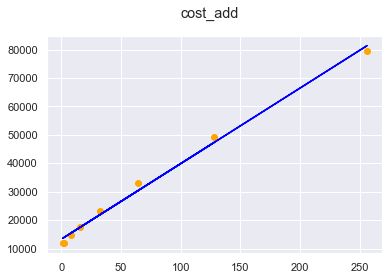

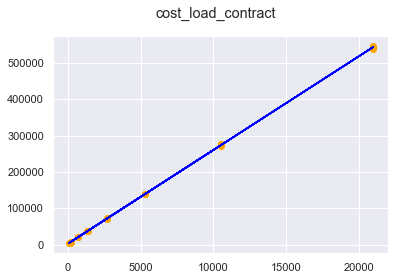

,a,b
cost_add,265.7858663562561,13313.544094
cost_load_contract,25.822549827351125,2459.665864


In [5]:
output = pd.DataFrame(columns=["a", "b"])

estimate_plot(df, 'cost_add', output)
# estimate_plot(df, 'cost_sub', output)
# estimate_plot(df, 'cost_le', output)
# estimate_plot(df, 'cost_leq', output)
# estimate_plot(df, 'cost_ge', output)
# estimate_plot(df, 'cost_geq', output)
# estimate_plot(df, 'cost_and', output)
# estimate_plot(df, 'cost_or', output)
# estimate_plot(df, 'cost_xor', output)
# estimate_plot(df, 'cost_not', output)
# estimate_plot(df, 'cost_eq', output)
# estimate_plot(df, 'cost_mod', output)
# estimate_plot(df, 'cost_pow', output)
# estimate_plot(df, 'cost_sqrti', output)
# estimate_plot(df, 'cost_log2', output)
# estimate_plot(df, 'cost_tuple_get', output, nlogn)
# estimate_plot(df, 'cost_tuple_merge', output)
# estimate_plot(df, 'cost_tuple_cons', output, nlogn)
# estimate_plot(df, 'cost_hash160', output)
# estimate_plot(df, 'cost_sha256', output)
# estimate_plot(df, 'cost_sha512', output)
# estimate_plot(df, 'cost_sha512t256', output)
# estimate_plot(df, 'cost_keccak256', output)
# estimate_plot(df, 'cost_secp256k1recover', output)
# estimate_plot(df, 'cost_secp256k1verify', output)
estimate_plot(df, 'cost_load_contract', output)

output

In [5]:
output.to_csv("cost_constants.csv")